1.0 % p values  меньше либо равны 0.05


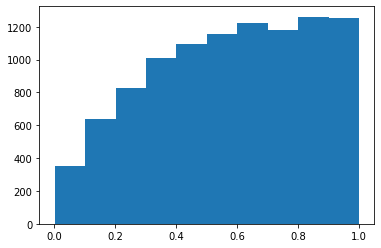

In [2]:
import pandas as pd
import pandahouse as ph
import random
from scipy import stats
import matplotlib.pyplot as plt


connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20220720',
                      'user':'student', 
                      'password':''
                     }


def break_into_groups(n, connection):  #  создать датафреймы для каждой из групп
    q = """
    SELECT exp_group, 
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes/views as ctr
    FROM {db}.feed_actions 
    WHERE toDate(time) between '2022-06-06' and '2022-06-12' 
        and exp_group==%s
    GROUP BY exp_group, user_id
    """ % n
    df = ph.read_clickhouse(q, connection=connection)
    return df


df_2=break_into_groups(2, connection)
df_3=break_into_groups(3, connection)
colone_ctr_2 = df_2['ctr'].tolist()
colone_ctr_3 = df_3['ctr'].tolist()
SUBSAMPLE_SIZE=500
test_results=[]
more=0  #  p values больше 0.05
less=0  #  p values меньше либо равен 0.05


def create_subsample(start_list, subsample_size):  # создать подвыборку из 500 элементов
    new_list=set()
    while len(new_list)<subsample_size: 
         new_list.add(start_list[random.randint(0,len(start_list)-1)])
    return list(new_list)


for i in range(0, 10000):  #  сравнить ctr двух групп и добавить p values в список
    new_2=(create_subsample(colone_ctr_2, SUBSAMPLE_SIZE))
    new_3=(create_subsample(colone_ctr_3, SUBSAMPLE_SIZE))
    test_results.append(stats.ttest_ind(new_2, new_3, equal_var=False)[1])
    
plt.hist(test_results)

for i in range(0, len(test_results)):
    if test_results[i]>0.05:
        more=more+1
    else:
        less=less+1
        
print(100*less/(less+more), "% p values  меньше либо равны 0.05" )







 Система сплитования работает корректно